# Análisis de datos de tarifas 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

## Extracción y limpieza de los datos

In [2]:
data = pd.read_csv("TarifasCORREGIDO.csv",sep="\t")

In [3]:
data

,Empresa,Mercado,Mes,Año,Per,GM,TM,PR,D,CV,RM,CUV,OP,E1,E2,E3,E4,E56,Día
0,CEDENAR S.A. E.S.P.,NARIÑO,Feb-23,2023,2,"324,660","48,710","72,810","276,700","148,250","21,440","892,560","828,330","333,200","416,500","704,080","828,330","994,000",25
1,CEDENAR S.A. E.S.P.,NARIÑO,Mar-23,2023,3,"377,450","52,367","81,730","279,310","152,910","17,480","961,260","842,080","338,740","423,420","715,770","842,080","1010,500",25
2,CEDENAR S.A. E.S.P.,NARIÑO,Abr-23,2023,4,"338,120","53,520","75,570","266,480","157,770","40,990","932,460","853,450","342,300","427,870","725,430","853,450","1024,140",25
3,CEDENAR S.A. E.S.P.,NARIÑO,May-23,2023,5,"266,070","48,530","63,260","262,120","165,290","39,120","844,400","862,670","347,450","434,310","733,270","862,670","1035,200",25
4,CEDENAR S.A. E.S.P.,NARIÑO,Jun-23,2023,6,"362,011","50,703","77,928","263,884","152,139","16,472","923,138","869,051","348,964","436,206","738,694","869,051","1042,862",25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,ESSA S.A. E.S.P.,SANTANDER,Feb-24,2024,2,"369,100","49,200","78,330","279,110","124,750","11,230","911,710",NaN,"383,530","479,410","774,960","911,710","1094,050",25
1502,ESSA S.A. E.S.P.,SANTANDER,Mar-24,2024,3,"376,010","57,430","80,250","293,480","122,660","7,080","936,920",NaN,"387,690","484,620","796,380","936,920","1124,300",25
1503,RUITOQUE S.A. E.S.P.,RUITOQUE,Ene-24,2024,1,"344,480","54,320","56,860","280,990","77,450","10,270","824,360","953,960",NaN,NaN,NaN,"953,960","1144,752",25
1504,RUITOQUE S.A. E.S.P.,RUITOQUE,Feb-24,2024,2,"383,490","49,200","62,050","279,110","73,020","8,340","855,210",NaN,NaN,NaN,NaN,"855,210","1026,252",25


In [4]:
data.columns

Index(['Empresa', 'Mercado', 'Mes', 'Año', 'Per', 'GM', 'TM', 'PR', 'D', 'CV',
       'RM', 'CUV', 'OP', 'E1', 'E2', 'E3', 'E4', 'E56', 'Día'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1506 entries, 0 to 1505
Data columns (total 19 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Empresa  1506 non-null   object
 1   Mercado  1506 non-null   object
 2   Mes      1506 non-null   object
 3   Año      1506 non-null   int64 
 4   Per      1506 non-null   int64 
 5   GM       1450 non-null   object
 6   TM       1450 non-null   object
 7   PR       1450 non-null   object
 8   D        1450 non-null   object
 9   CV       1450 non-null   object
 10  RM       1450 non-null   object
 11  CUV      1450 non-null   object
 12  OP       1182 non-null   object
 13  E1       1399 non-null   object
 14  E2       1399 non-null   object
 15  E3       1399 non-null   object
 16  E4       1450 non-null   object
 17  E56      1420 non-null   object
 18  Día      1506 non-null   int64 
dtypes: int64(3), object(16)
memory usage: 223.7+ KB


In [6]:
df = data.copy()

In [7]:
#convert to float
num_cols = ['GM', 'TM', 'PR', 'D', 'CV','RM', 'CUV', 'OP', 'E1', 'E2', 'E3', 'E4', 'E56']
for i in num_cols:
    df[i] = df[i].str.replace(",",".").astype(float)

In [8]:
df["Mes"].unique()

array(['Feb-23', 'Mar-23', 'Abr-23', 'May-23', 'Jun-23', 'Jul-23',
       'Ago-23', 'Sep-23', 'Oct-23', 'Nov-23', 'Dic-23', 'Ene-24',
       'Ene-23', 'Ene-22', 'Feb-22', 'Mar-22', 'Abr-22', 'May-22',
       'Jun-22', 'jul-22', 'Ago-22', 'Sep-22', 'Oct-22', 'Nov-22',
       'Dic-22', 'Ene-21', 'Feb-21', 'Mar-21', 'Abr-21', 'May-21',
       'Jun-21', 'Jul-21', 'Ago-21', 'Sep-21', 'Oct-21', 'Nov-21',
       'Dic-21', 'Ene-20', 'Feb-20', 'Mar-20', 'Abr-20', 'May-20',
       'Jun-20', 'Jul-20', 'Ago-20', 'Sep-20', 'Oct-20', 'Nov-20',
       'Dic-20', 'Jul-22', 'ago-22', 'sep-22', 'oct-22', 'Agos-23',
       'oct-23', 'Sep-22**', 'Oct-22**', 'JuL-21', 'Ago-21**', 'Ene-21**',
       'Agos-22', '**Jul-22', 'Oct-23**', 'Abr-23**', 'Feb-24', 'Mar-24'],
      dtype=object)

In [9]:
df["Mes"] = df["Mes"].str.lower().str.replace("*","").str.capitalize()

In [10]:
df["Mes"].unique()

array(['Feb-23', 'Mar-23', 'Abr-23', 'May-23', 'Jun-23', 'Jul-23',
       'Ago-23', 'Sep-23', 'Oct-23', 'Nov-23', 'Dic-23', 'Ene-24',
       'Ene-23', 'Ene-22', 'Feb-22', 'Mar-22', 'Abr-22', 'May-22',
       'Jun-22', 'Jul-22', 'Ago-22', 'Sep-22', 'Oct-22', 'Nov-22',
       'Dic-22', 'Ene-21', 'Feb-21', 'Mar-21', 'Abr-21', 'May-21',
       'Jun-21', 'Jul-21', 'Ago-21', 'Sep-21', 'Oct-21', 'Nov-21',
       'Dic-21', 'Ene-20', 'Feb-20', 'Mar-20', 'Abr-20', 'May-20',
       'Jun-20', 'Jul-20', 'Ago-20', 'Sep-20', 'Oct-20', 'Nov-20',
       'Dic-20', 'Agos-23', 'Agos-22', 'Feb-24', 'Mar-24'], dtype=object)

In [11]:
df["Empresa"].unique()

array(['CEDENAR S.A. E.S.P.', 'CELSIA COLOMBIA S.A. E.S.P. VALLE',
       'CELSIA COLOMBIA S.A. E.S.P. TOLIMA', 'CENS S.A. E.S.P.',
       'CEO S.A.S. E.S.P.', 'CETSA S.A. E.S.P.', 'CHEC S.A. E.S.P.',
       'CODENSA S.A. E.S.P.', 'DISPAC S.A. E.S.P.', 'EBSA S.A. E.S.P.',
       'EDEQ S.A. E.S.P.', 'EE PUTUMAYO S.A. E.S.P.', 'EEBP S.A. E.S.P.',
       'EEP S.A. E.S.P. (Pereira)', 'AIR-E S.A.S. E.S.P.',
       'CARIBEMAR DE LA COSTA S.A.S. E.S.P. (AFINIA)',
       'ELECTROCAQUETÁ S.A. E.S.P.', 'ELECTROHUILA S.A. E.S.P.',
       'EMCALI E.I.C.E. E.S.P.', 'EEP S.A. E.S.P. (Cartago)',
       'EMEESA S.A. E.S.P.', 'EMEVASI S.A. E.S.P.', 'EMSA S.A. E.S.P.',
       'ENELAR S.A. E.S.P.', 'ENERCA S.A. E.S.P.', 'ENERGUVIARE E.S.P.',
       'EPM E.S.P.', 'ESSA S.A. E.S.P.', 'RUITOQUE S.A. E.S.P.',
       'ELECTRICARIBE S.A. E.S.P.', 'ENEL COLOMBIA S.A. E.S.P.'],
      dtype=object)

In [12]:
df.loc[df["Empresa"]=='ELECTRICARIBE S.A. E.S.P.',"Empresa"] = 'AIR-E S.A.S. E.S.P.'
df.loc[df["Empresa"]=='CODENSA S.A. E.S.P.',"Empresa"]= 'ENEL COLOMBIA S.A. E.S.P.'

In [13]:
df["Date"] = df["Año"].astype(str)+"-"+df["Per"].astype(str)
df["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m')
df.sort_values(by=["Empresa","Date"],inplace=True)
df.reset_index(drop=True,inplace=True)
#df

In [14]:
df.isna().sum()

Empresa      0
Mercado      0
Mes          0
Año          0
Per          0
GM          56
TM          56
PR          56
D           56
CV          56
RM          56
CUV         56
OP         324
E1         107
E2         107
E3         107
E4          56
E56         86
Día          0
Date         0
dtype: int64

In [15]:
col = ['GM', 'TM', 'PR', 'D', 'CV','RM']
df.dropna(subset=col,inplace=True)
#df.reset_index(inplace=True)
df.shape

(1450, 20)

In [16]:
df["aux"] = df["Empresa"]+df["Mes"]
df.drop_duplicates(subset=["aux"],inplace=True)
df.drop(labels=["aux"],axis=1,inplace=True)
df.reset_index(drop=True,inplace=True)
df.shape

(1445, 20)

In [17]:
df

,Empresa,Mercado,Mes,Año,Per,GM,TM,PR,D,CV,RM,CUV,OP,E1,E2,E3,E4,E56,Día,Date
0,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Ene-20,2020,1,233.490,33.620,43.050,132.970,66.090,0.120,509.340,509.340,218.467,273.084,432.94,509.338,611.206,25,2020-01
1,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Feb-20,2020,2,263.908,35.413,47.857,122.237,68.119,2.772,540.307,540.307,219.393,274.241,459.26,540.307,648.368,25,2020-02
2,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Mar-20,2020,3,282.240,38.396,50.880,111.079,69.654,0.944,553.193,553.193,221.280,276.600,470.21,553.190,663.828,25,2020-03
3,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Abr-20,2020,4,283.152,38.790,51.041,120.265,73.552,6.290,573.091,553.193,222.520,278.160,470.21,553.190,663.828,25,2020-04
4,AIR-E S.A.S. E.S.P.,COSTA CARIBE,May-20,2020,5,254.810,43.930,48.200,136.000,76.060,14.570,573.580,553.193,222.880,278.610,470.21,553.190,663.828,25,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,RUITOQUE S.A. E.S.P.,RUITOQUE,Nov-23,2023,11,370.710,46.250,59.640,298.080,73.930,2.200,850.810,942.620,NaN,NaN,NaN,942.620,1131.144,25,2023-11
1441,RUITOQUE S.A. E.S.P.,RUITOQUE,Dic-23,2023,12,363.470,51.240,60.700,299.400,73.370,17.130,865.310,948.270,NaN,NaN,NaN,948.270,1137.924,25,2023-12
1442,RUITOQUE S.A. E.S.P.,RUITOQUE,Ene-24,2024,1,344.480,54.320,56.860,280.990,77.450,10.270,824.360,953.960,NaN,NaN,NaN,953.960,1144.752,25,2024-01
1443,RUITOQUE S.A. E.S.P.,RUITOQUE,Feb-24,2024,2,383.490,49.200,62.050,279.110,73.020,8.340,855.210,NaN,NaN,NaN,NaN,855.210,1026.252,25,2024-02


In [18]:
# IPC
data_ipc = pd.read_excel("anex-IPC-mar2024.xlsx",sheet_name="10",header=6)
#data_ipc.head(20)

In [19]:
ipc = data_ipc.iloc[133:184,:3].reset_index(drop=True)
meses = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre","Octubre","Noviembre","Diciembre"]
dict_meses = {k:v for (k,v) in zip(meses,range(1,13))}
ipc["Date"] = ipc["Año"].astype(str)+"-"+(ipc["Mes"].apply(lambda x: dict_meses[x])).astype(str)
ipc["Date"] = pd.to_datetime(df["Date"]).dt.strftime('%Y-%m')
ipc.set_index("Date",inplace=True)
ipc.head()

,Año,Mes,Índice
Date,,,
2020-01,2020,Enero,103.82
2020-02,2020,Febrero,104.47
2020-03,2020,Marzo,104.75
2020-04,2020,Abril,104.55
2020-05,2020,Mayo,104.14


In [20]:
df

,Empresa,Mercado,Mes,Año,Per,GM,TM,PR,D,CV,RM,CUV,OP,E1,E2,E3,E4,E56,Día,Date
0,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Ene-20,2020,1,233.490,33.620,43.050,132.970,66.090,0.120,509.340,509.340,218.467,273.084,432.94,509.338,611.206,25,2020-01
1,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Feb-20,2020,2,263.908,35.413,47.857,122.237,68.119,2.772,540.307,540.307,219.393,274.241,459.26,540.307,648.368,25,2020-02
2,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Mar-20,2020,3,282.240,38.396,50.880,111.079,69.654,0.944,553.193,553.193,221.280,276.600,470.21,553.190,663.828,25,2020-03
3,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Abr-20,2020,4,283.152,38.790,51.041,120.265,73.552,6.290,573.091,553.193,222.520,278.160,470.21,553.190,663.828,25,2020-04
4,AIR-E S.A.S. E.S.P.,COSTA CARIBE,May-20,2020,5,254.810,43.930,48.200,136.000,76.060,14.570,573.580,553.193,222.880,278.610,470.21,553.190,663.828,25,2020-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1440,RUITOQUE S.A. E.S.P.,RUITOQUE,Nov-23,2023,11,370.710,46.250,59.640,298.080,73.930,2.200,850.810,942.620,NaN,NaN,NaN,942.620,1131.144,25,2023-11
1441,RUITOQUE S.A. E.S.P.,RUITOQUE,Dic-23,2023,12,363.470,51.240,60.700,299.400,73.370,17.130,865.310,948.270,NaN,NaN,NaN,948.270,1137.924,25,2023-12
1442,RUITOQUE S.A. E.S.P.,RUITOQUE,Ene-24,2024,1,344.480,54.320,56.860,280.990,77.450,10.270,824.360,953.960,NaN,NaN,NaN,953.960,1144.752,25,2024-01
1443,RUITOQUE S.A. E.S.P.,RUITOQUE,Feb-24,2024,2,383.490,49.200,62.050,279.110,73.020,8.340,855.210,NaN,NaN,NaN,NaN,855.210,1026.252,25,2024-02


In [21]:
df.set_index("Date",inplace=True)
df["ipc"] = 0
for i in df.index:
    df.loc[i,"ipc"] = ipc.loc[i,"Índice"]
df.reset_index(inplace=True)

df_ipc = df.copy()    
df_ipc[num_cols] = df_ipc[num_cols].div(df_ipc["ipc"],axis=0)*100 # Deflactado al IPC Diciembre 2018

In [22]:
df.head(10)

,Date,Empresa,Mercado,Mes,Año,Per,GM,TM,PR,D,...,RM,CUV,OP,E1,E2,E3,E4,E56,Día,ipc
0,2020-01,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Ene-20,2020,1,233.490,33.620,43.050,132.970,...,0.120,509.340,509.340,218.467,273.084,432.94,509.338,611.206,25,103.82
1,2020-02,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Feb-20,2020,2,263.908,35.413,47.857,122.237,...,2.772,540.307,540.307,219.393,274.241,459.26,540.307,648.368,25,104.47
2,2020-03,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Mar-20,2020,3,282.240,38.396,50.880,111.079,...,0.944,553.193,553.193,221.280,276.600,470.21,553.190,663.828,25,104.75
3,2020-04,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Abr-20,2020,4,283.152,38.790,51.041,120.265,...,6.290,573.091,553.193,222.520,278.160,470.21,553.190,663.828,25,104.55
4,2020-05,AIR-E S.A.S. E.S.P.,COSTA CARIBE,May-20,2020,5,254.810,43.930,48.200,136.000,...,14.570,573.580,553.193,222.880,278.610,470.21,553.190,663.828,25,104.14
5,2020-06,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Jun-20,2020,6,281.120,43.100,51.950,134.170,...,2.260,588.220,553.193,222.160,277.710,470.21,553.190,663.828,25,103.70
6,2020-07,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Jul-20,2020,7,249.560,34.330,47.480,136.250,...,7.460,554.330,553.193,221.340,276.690,470.21,553.190,663.830,25,103.86
7,2020-08,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Ago-20,2020,8,200.010,38.100,40.220,134.570,...,23.990,513.450,553.193,221.340,276.690,470.21,553.190,663.830,25,103.94
8,2020-09,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Sep-20,2020,9,200.070,36.430,40.430,134.420,...,25.550,509.080,546.420,218.630,273.300,464.46,546.420,655.700,25,104.34
9,2020-10,AIR-E S.A.S. E.S.P.,CARIBE SOL,Oct-20,2020,10,219.970,38.710,41.450,136.190,...,25.550,534.060,NaN,213.690,267.120,453.95,534.060,640.880,25,104.33


In [23]:
df_ipc.head(10)

,Date,Empresa,Mercado,Mes,Año,Per,GM,TM,PR,D,...,RM,CUV,OP,E1,E2,E3,E4,E56,Día,ipc
0,2020-01,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Ene-20,2020,1,224.898863,32.382971,41.465999,128.077442,...,0.115585,490.599114,490.599114,210.428626,263.036024,417.010210,490.597187,588.717010,25,103.82
1,2020-02,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Feb-20,2020,2,252.616062,33.897770,45.809323,117.006796,...,2.653393,517.188667,517.188667,210.005743,262.506940,439.609457,517.188667,620.626017,25,104.47
2,2020-03,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Mar-20,2020,3,269.441527,36.654893,48.572792,106.042005,...,0.901193,528.107876,528.107876,211.245823,264.057279,448.887828,528.105012,633.726014,25,104.75
3,2020-04,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Abr-20,2020,4,270.829268,37.101865,48.819703,115.031086,...,6.016260,548.150167,529.118125,212.835964,266.054519,449.746533,529.115256,634.938307,25,104.55
4,2020-05,AIR-E S.A.S. E.S.P.,COSTA CARIBE,May-20,2020,5,244.680238,42.183599,46.283849,130.593432,...,13.990782,550.777799,531.201268,214.019589,267.534089,451.517188,531.198387,637.438064,25,104.14
5,2020-06,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Jun-20,2020,6,271.089682,41.562199,50.096432,129.382835,...,2.179364,567.232401,533.455159,214.233365,267.801350,453.432980,533.452266,640.142719,25,103.70
6,2020-07,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Jul-20,2020,7,240.284999,33.054111,45.715386,131.186212,...,7.182746,533.728096,532.633353,213.113807,266.406701,452.734450,532.630464,639.158483,25,103.86
7,2020-08,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Ago-20,2020,8,192.428324,36.655763,38.695401,129.468924,...,23.080623,493.986916,532.223398,212.949779,266.201655,452.385992,532.220512,638.666538,25,103.94
8,2020-09,AIR-E S.A.S. E.S.P.,COSTA CARIBE,Sep-20,2020,9,191.748131,34.914702,38.748323,128.828829,...,24.487253,487.904926,523.691777,209.536132,261.932145,445.140886,523.691777,628.426299,25,104.34
9,2020-10,AIR-E S.A.S. E.S.P.,CARIBE SOL,Oct-20,2020,10,210.840602,37.103422,39.729704,130.537717,...,24.489600,511.894949,NaN,204.821240,256.033739,435.109748,511.894949,614.281606,25,104.33


## Análisis de datos

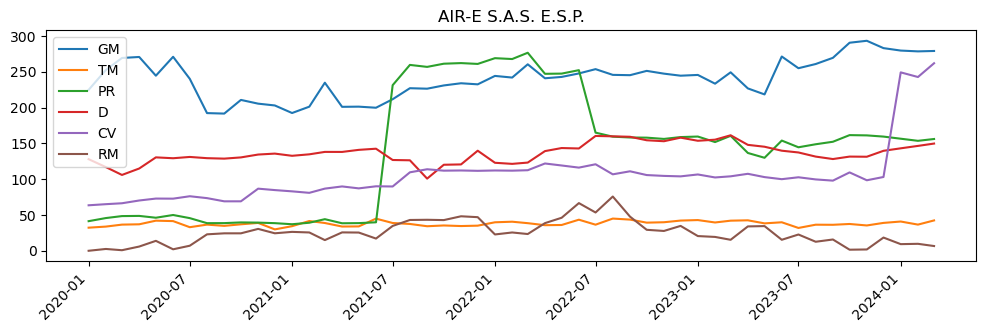

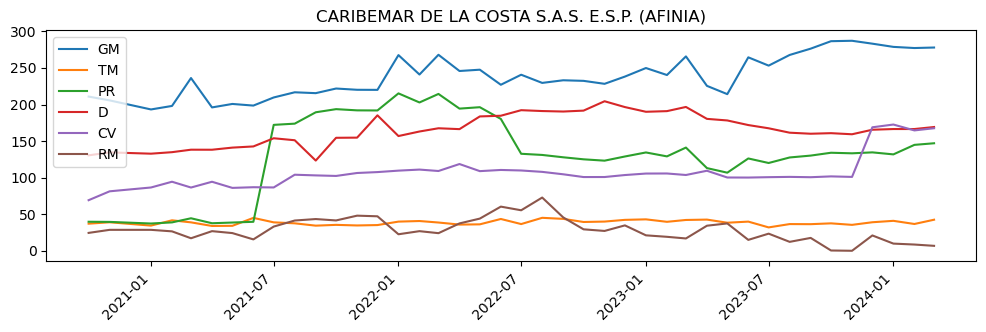

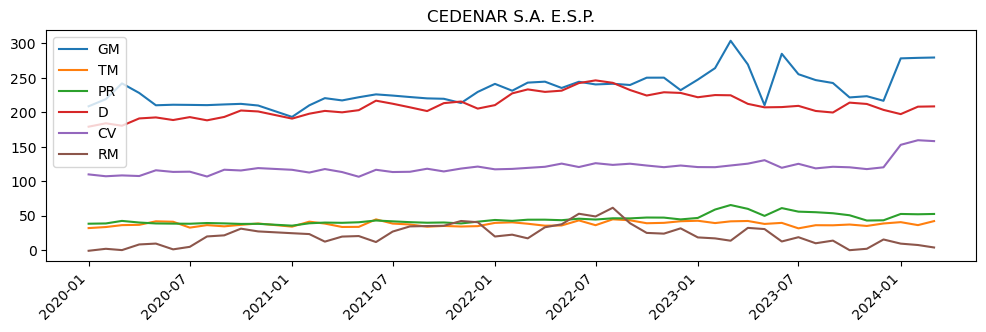

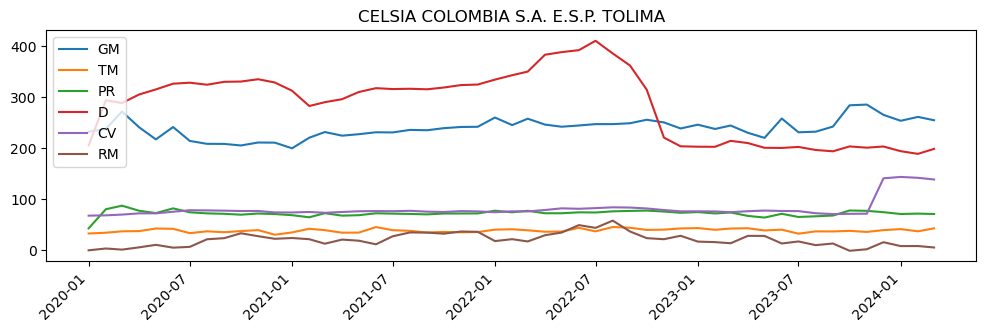

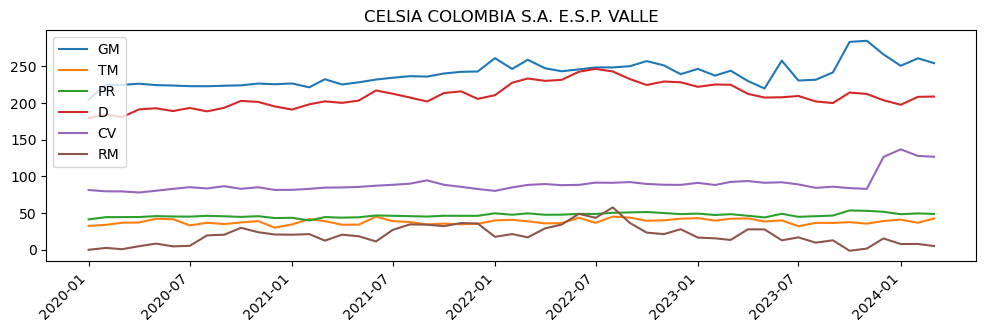

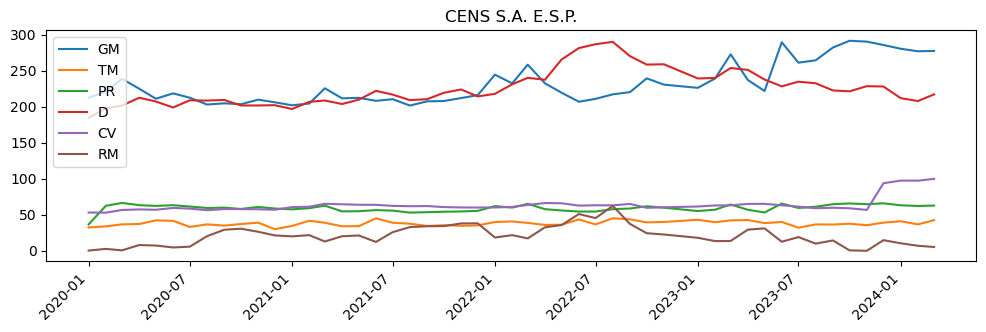

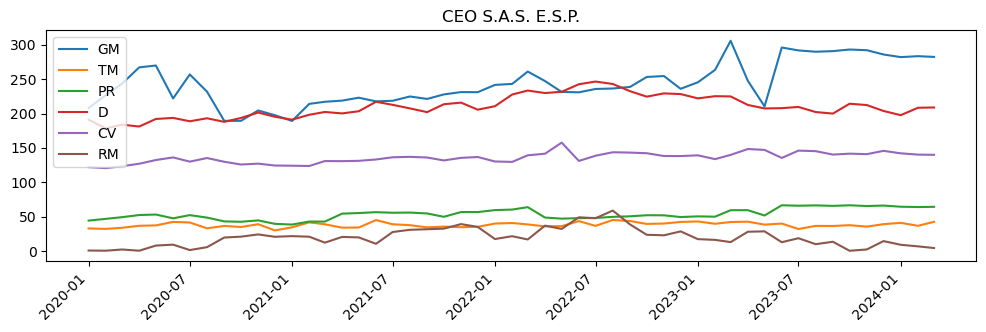

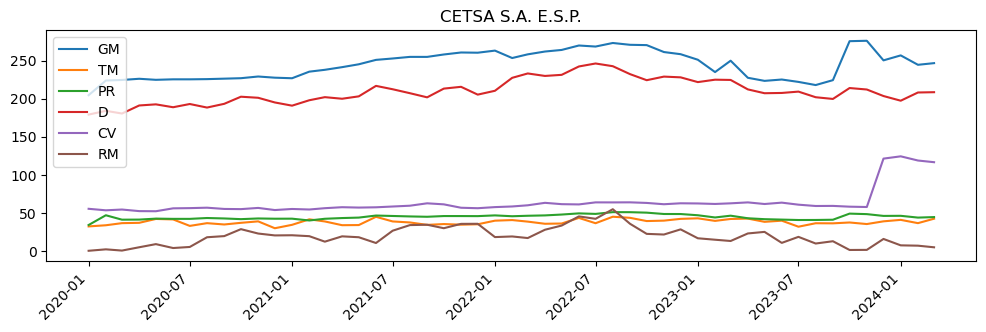

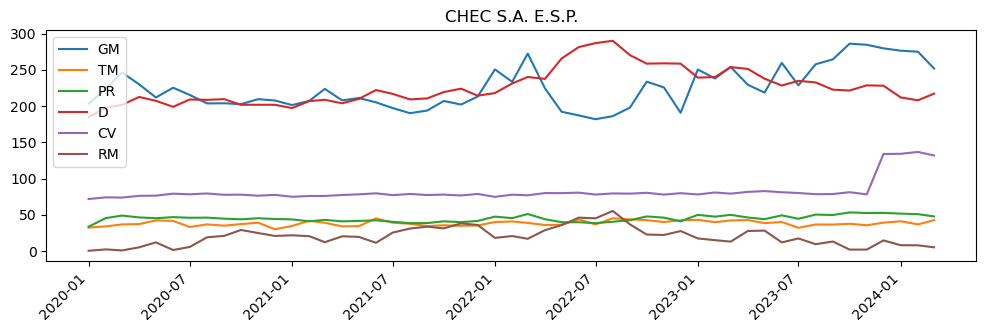

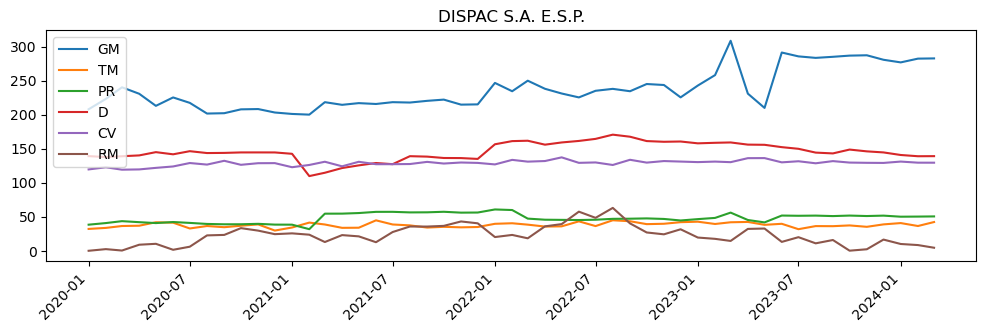

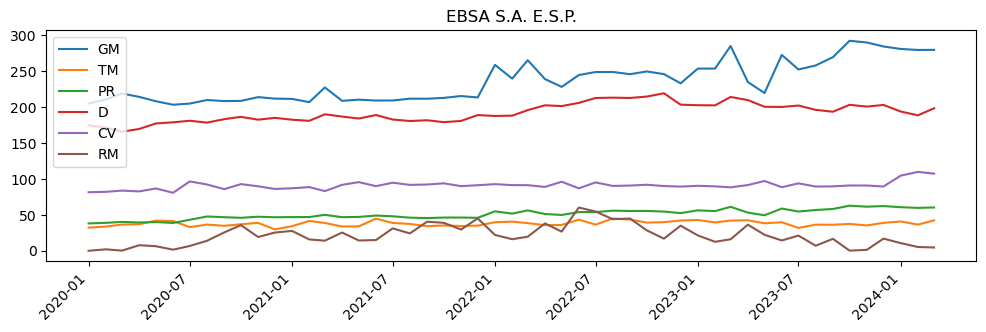

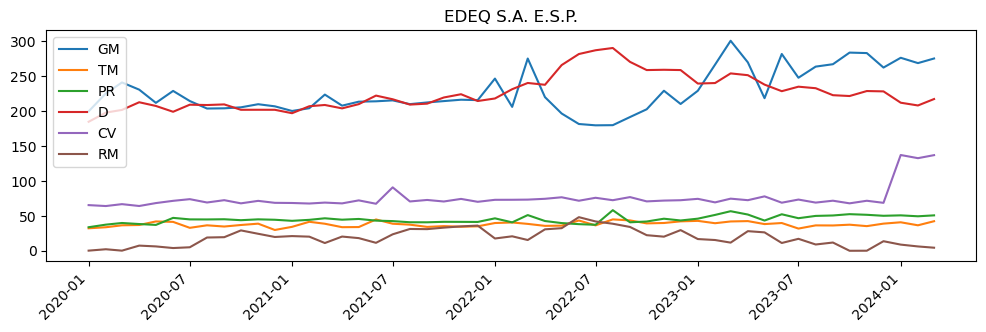

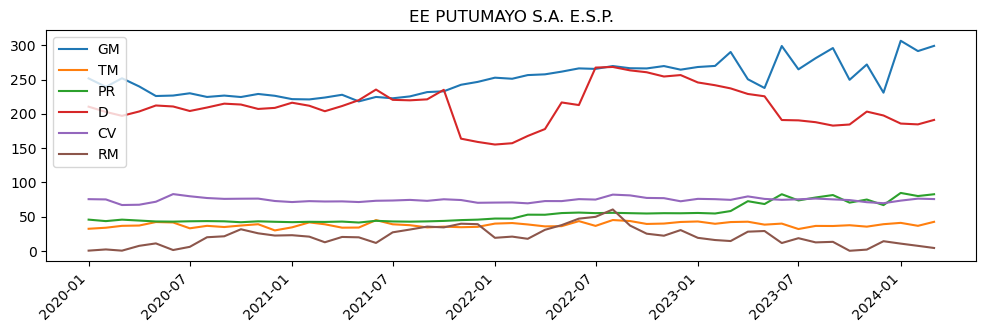

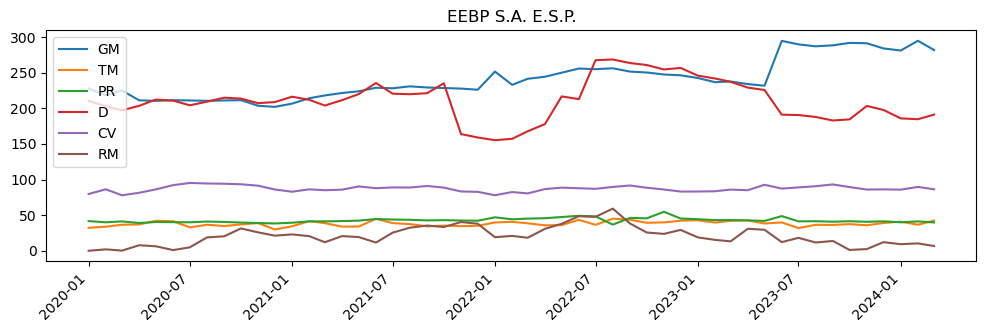

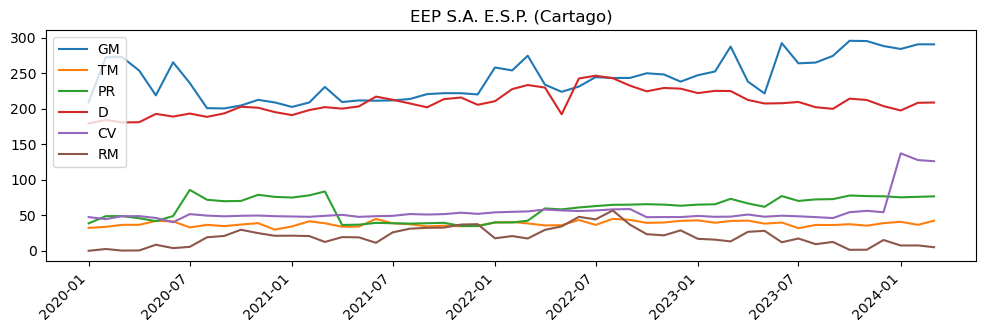

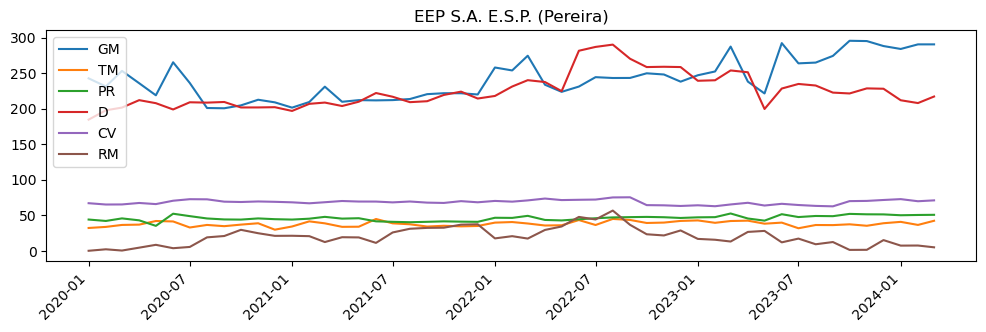

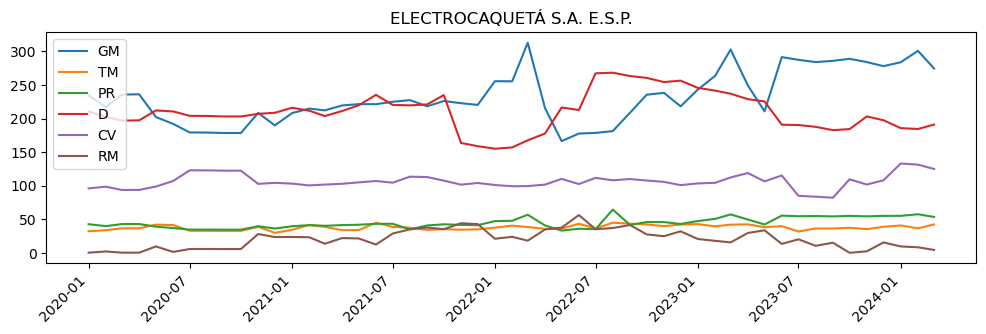

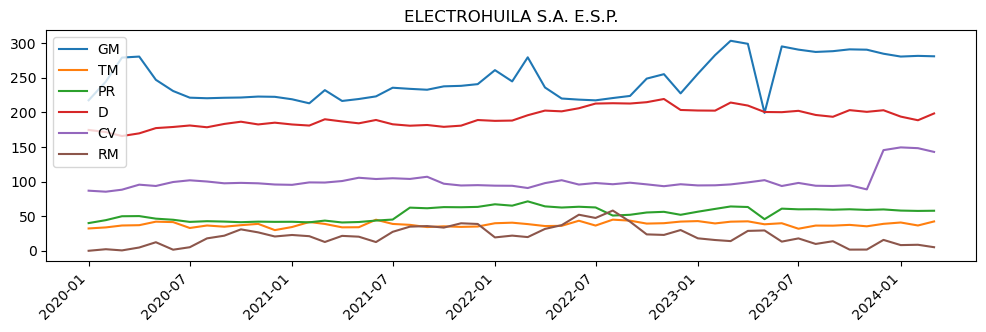

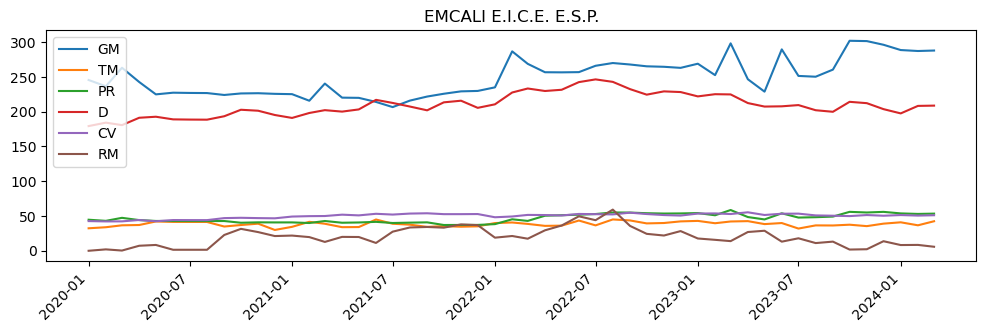

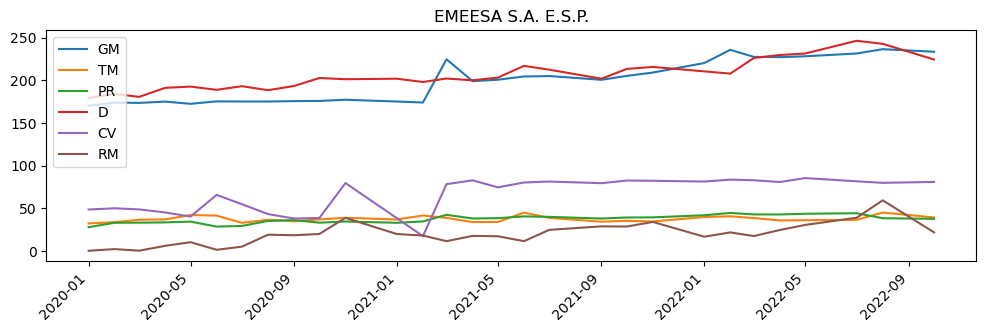

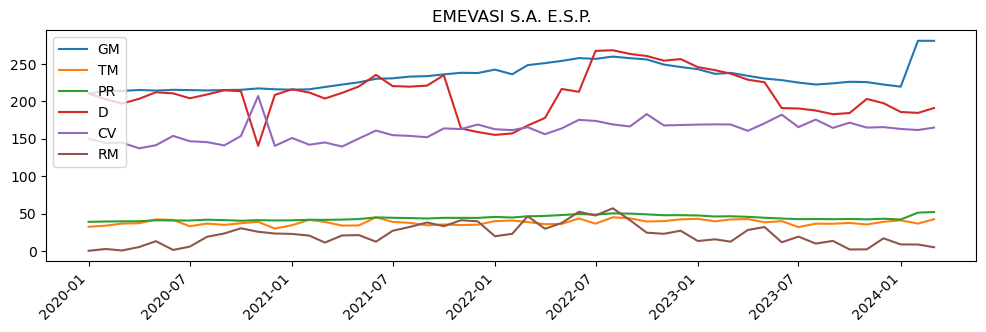

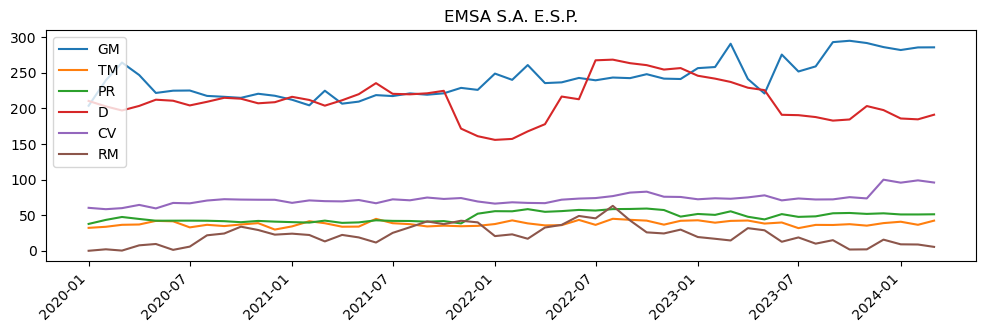

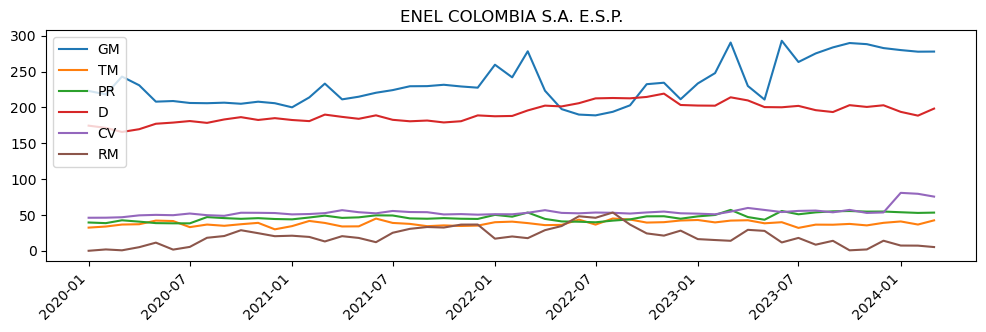

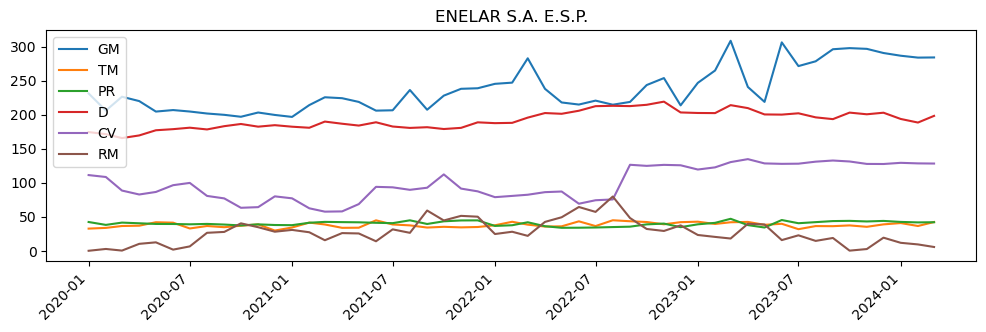

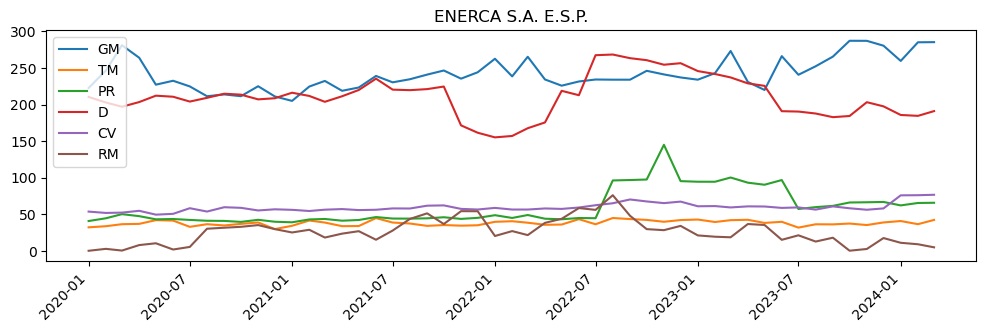

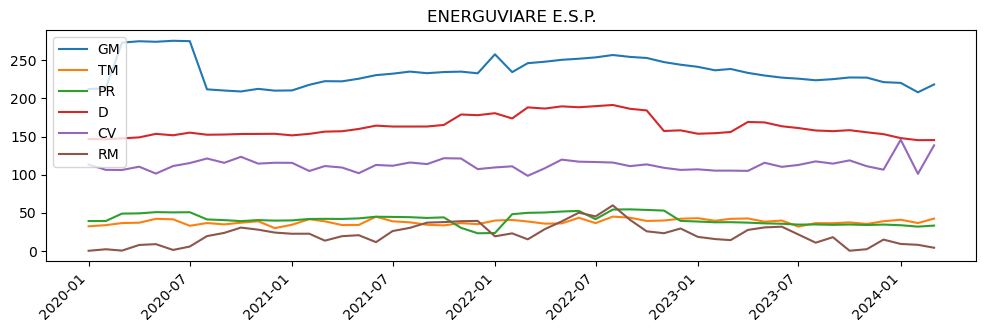

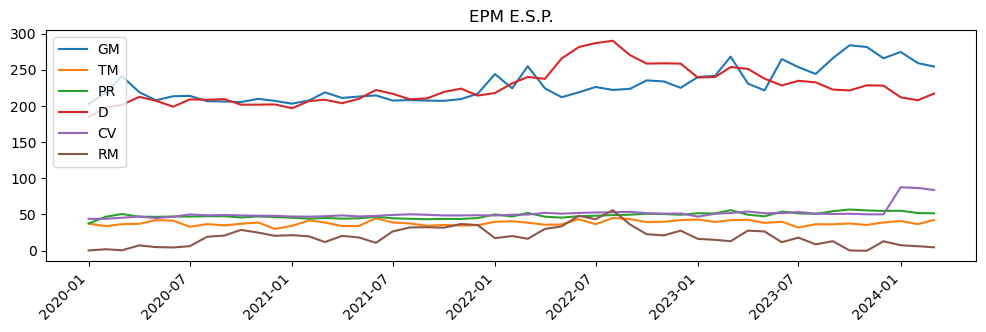

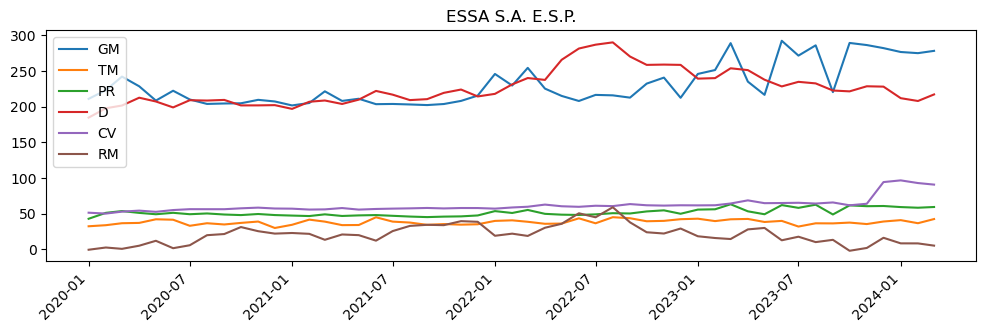

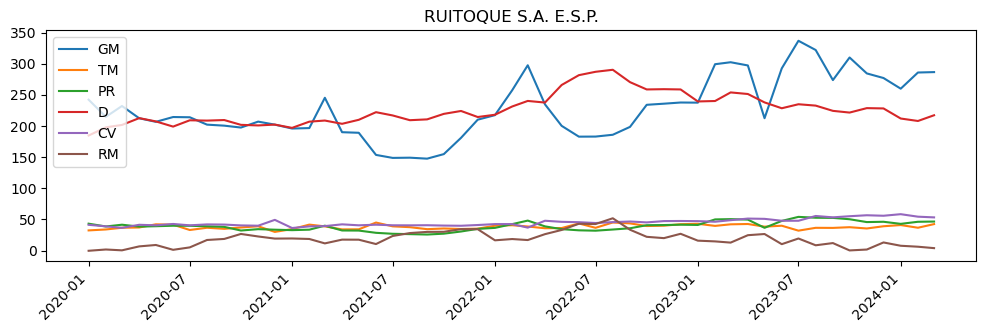

In [24]:
col = ['GM', 'TM', 'PR', 'D', 'CV','RM']
cols =  col + ['Empresa','CUV','Date']
empresas = df_ipc["Empresa"].unique()
index_max1 = []
for empresa in empresas:
    df2 = df_ipc.loc[df_ipc["Empresa"]==empresa,cols]
    df2.set_index("Date",inplace=True)
    df2.index = pd.to_datetime(df2.index)
    plt.figure(figsize = (12, 3))
    for i in col:
        plt.plot(df2[i],label=i)
    plt.xticks(rotation=45, horizontalalignment='right')
    plt.title(empresa)
    plt.legend(loc = "upper left")
    plt.show()

In [25]:
df_means = df_ipc[["Empresa"]+col].groupby("Empresa").aggregate("mean")
df_means.idxmax(axis=1)

Empresa
AIR-E S.A.S. E.S.P.                             GM
CARIBEMAR DE LA COSTA S.A.S. E.S.P. (AFINIA)    GM
CEDENAR S.A. E.S.P.                             GM
CELSIA COLOMBIA S.A. E.S.P. TOLIMA               D
CELSIA COLOMBIA S.A. E.S.P. VALLE               GM
CENS S.A. E.S.P.                                GM
CEO S.A.S. E.S.P.                               GM
CETSA S.A. E.S.P.                               GM
CHEC S.A. E.S.P.                                 D
DISPAC S.A. E.S.P.                              GM
EBSA S.A. E.S.P.                                GM
EDEQ S.A. E.S.P.                                GM
EE PUTUMAYO S.A. E.S.P.                         GM
EEBP S.A. E.S.P.                                GM
EEP S.A. E.S.P. (Cartago)                       GM
EEP S.A. E.S.P. (Pereira)                       GM
ELECTROCAQUETÁ S.A. E.S.P.                      GM
ELECTROHUILA S.A. E.S.P.                        GM
EMCALI E.I.C.E. E.S.P.                          GM
EMEESA S.A. E.S.P.     

In [26]:
print("Componentes de tarifa con mayor promedio")
print(df_means.idxmax(axis=1).value_counts())

Componentes de tarifa con mayor promedio
GM    26
D      3
dtype: int64


In [27]:
df_stds = df_ipc[["Empresa"]+col].groupby("Empresa").aggregate("std")
(df_stds).idxmax(axis=1)

Empresa
AIR-E S.A.S. E.S.P.                             PR
CARIBEMAR DE LA COSTA S.A.S. E.S.P. (AFINIA)    PR
CEDENAR S.A. E.S.P.                             GM
CELSIA COLOMBIA S.A. E.S.P. TOLIMA               D
CELSIA COLOMBIA S.A. E.S.P. VALLE                D
CENS S.A. E.S.P.                                GM
CEO S.A.S. E.S.P.                               GM
CETSA S.A. E.S.P.                               GM
CHEC S.A. E.S.P.                                GM
DISPAC S.A. E.S.P.                              GM
EBSA S.A. E.S.P.                                GM
EDEQ S.A. E.S.P.                                GM
EE PUTUMAYO S.A. E.S.P.                          D
EEBP S.A. E.S.P.                                 D
EEP S.A. E.S.P. (Cartago)                       GM
EEP S.A. E.S.P. (Pereira)                       GM
ELECTROCAQUETÁ S.A. E.S.P.                      GM
ELECTROHUILA S.A. E.S.P.                        GM
EMCALI E.I.C.E. E.S.P.                          GM
EMEESA S.A. E.S.P.     

In [28]:
print("Componentes de tarifa con mayor volatilidad")
print((df_stds).idxmax(axis=1).value_counts())

Componentes de tarifa con mayor volatilidad
GM    19
D      8
PR     2
dtype: int64


In [29]:
(df_stds/df_means).idxmax(axis=1)

Empresa
AIR-E S.A.S. E.S.P.                             RM
CARIBEMAR DE LA COSTA S.A.S. E.S.P. (AFINIA)    RM
CEDENAR S.A. E.S.P.                             RM
CELSIA COLOMBIA S.A. E.S.P. TOLIMA              RM
CELSIA COLOMBIA S.A. E.S.P. VALLE               RM
CENS S.A. E.S.P.                                RM
CEO S.A.S. E.S.P.                               RM
CETSA S.A. E.S.P.                               RM
CHEC S.A. E.S.P.                                RM
DISPAC S.A. E.S.P.                              RM
EBSA S.A. E.S.P.                                RM
EDEQ S.A. E.S.P.                                RM
EE PUTUMAYO S.A. E.S.P.                         RM
EEBP S.A. E.S.P.                                RM
EEP S.A. E.S.P. (Cartago)                       RM
EEP S.A. E.S.P. (Pereira)                       RM
ELECTROCAQUETÁ S.A. E.S.P.                      RM
ELECTROHUILA S.A. E.S.P.                        RM
EMCALI E.I.C.E. E.S.P.                          RM
EMEESA S.A. E.S.P.     

In [30]:
print("Componentes de tarifa con mayor \nvolatilidad relativa a su media")
print((df_stds/df_means).idxmax(axis=1).value_counts())

Componentes de tarifa con mayor 
volatilidad relativa a su media
RM    29
dtype: int64


In [31]:
index_max1 = []
for empresa in empresas:
    df2 = df_ipc.loc[df_ipc["Empresa"]==empresa,cols]
    df2["Date_aux"] = pd.to_datetime(df2["Date"])
    df2.set_index("Date",inplace=True)
    comp = "GM"
    index_max1.append([empresa,df2[comp].idxmax(),((df2[comp].diff())/(df2["Date_aux"].diff().apply(lambda x:x.days))).idxmax()])

In [32]:
ind1 = pd.DataFrame(index_max1,columns=["Empresa","Fecha de máximo precio","Fecha de máximo crecimiento de precio"])
ind1

,Empresa,Fecha de máximo precio,Fecha de máximo crecimiento de precio
0,AIR-E S.A.S. E.S.P.,2023-11,2023-06
1,CARIBEMAR DE LA COSTA S.A.S. E.S.P. (AFINIA),2023-11,2023-06
2,CEDENAR S.A. E.S.P.,2023-03,2023-06
3,CELSIA COLOMBIA S.A. E.S.P. TOLIMA,2023-11,2023-10
4,CELSIA COLOMBIA S.A. E.S.P. VALLE,2023-11,2023-10
5,CENS S.A. E.S.P.,2023-10,2023-06
6,CEO S.A.S. E.S.P.,2023-03,2023-06
7,CETSA S.A. E.S.P.,2023-11,2023-10
8,CHEC S.A. E.S.P.,2023-10,2023-01
9,DISPAC S.A. E.S.P.,2023-03,2023-06


In [33]:
print("Fechas de máximo precio GM")
print(ind1["Fecha de máximo precio"].value_counts())

Fechas de máximo precio GM
2023-10    9
2023-03    6
2023-11    5
2024-02    2
2023-06    2
2024-01    1
2022-03    1
2022-08    1
2020-06    1
2023-07    1
Name: Fecha de máximo precio, dtype: int64


In [34]:
print("Fechas de máximo crecimiento de precio GM")
print(ind1["Fecha de máximo crecimiento de precio"].value_counts())

Fechas de máximo crecimiento de precio GM
2023-06    20
2023-10     3
2023-01     1
2022-03     1
2024-01     1
2021-03     1
2024-02     1
2020-03     1
Name: Fecha de máximo crecimiento de precio, dtype: int64


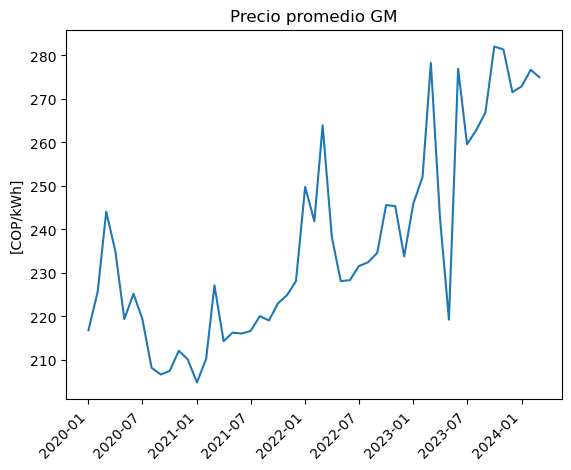

In [35]:
cuv_mean = df_ipc[["Date","GM"]].groupby("Date").mean()
cuv_mean.index = pd.to_datetime(cuv_mean.index)
plt.plot(cuv_mean)
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Precio promedio GM")
plt.ylabel("[COP/kWh]")
#plt.vlines(["2023-10-01"],ymin=210,ymax=290,color="k",linestyle="dashed")

plt.show()

In [36]:
cuv_mean.reset_index(inplace=True)
cuv_mean["Date"] = cuv_mean["Date"].dt.strftime('%Y-%m')
cuv_mean.set_index("Date",inplace=True)
cuv_mean.idxmax()

GM    2023-10
dtype: object

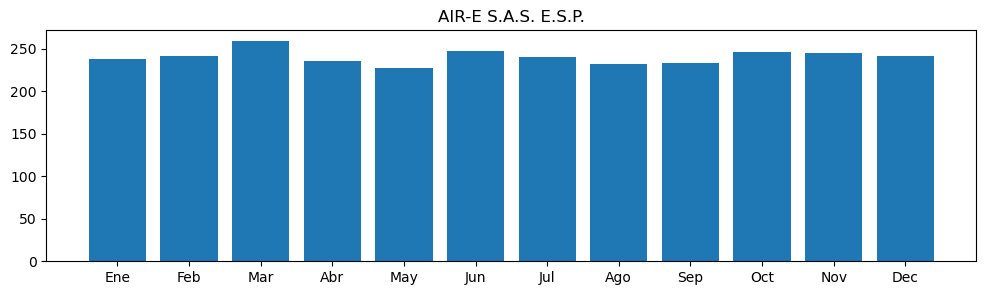

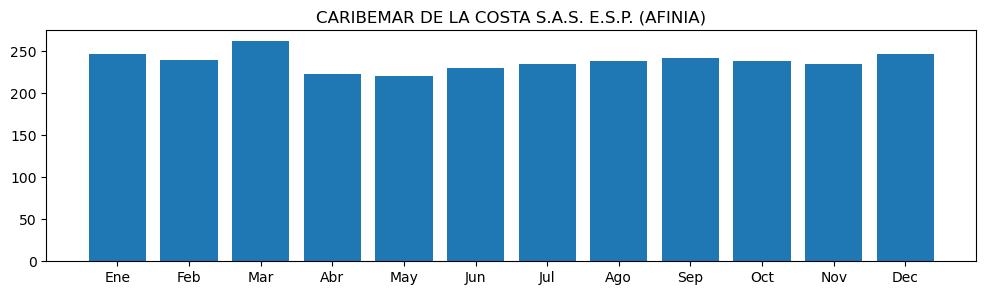

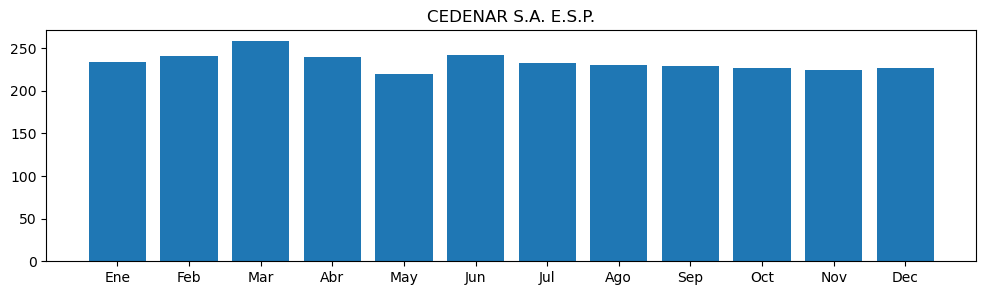

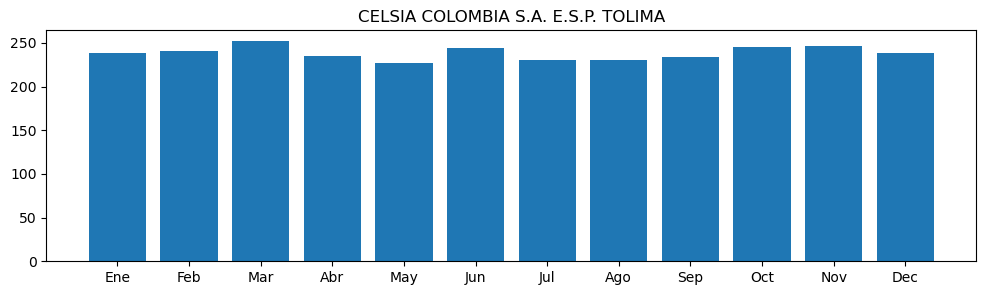

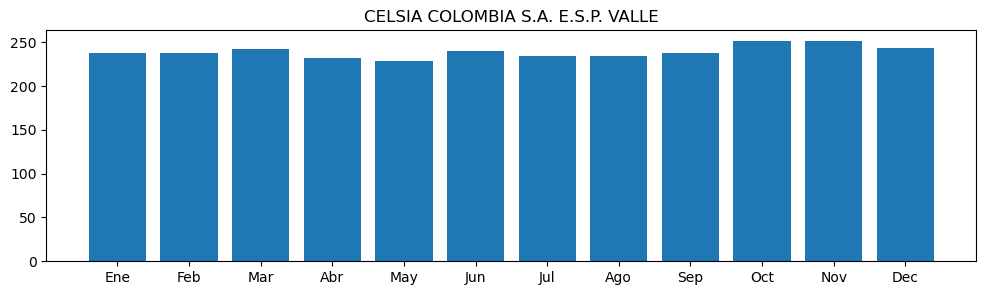

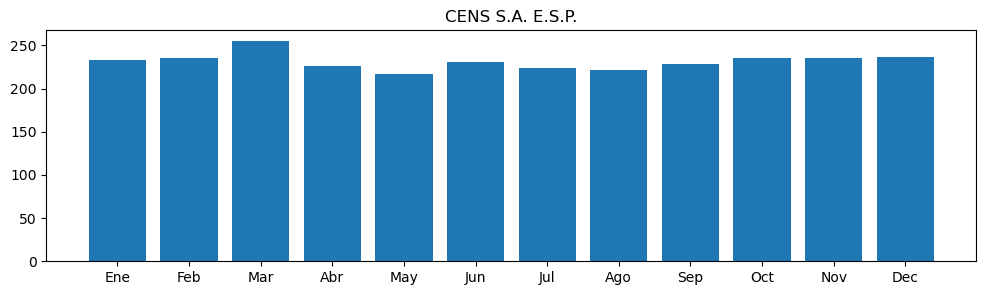

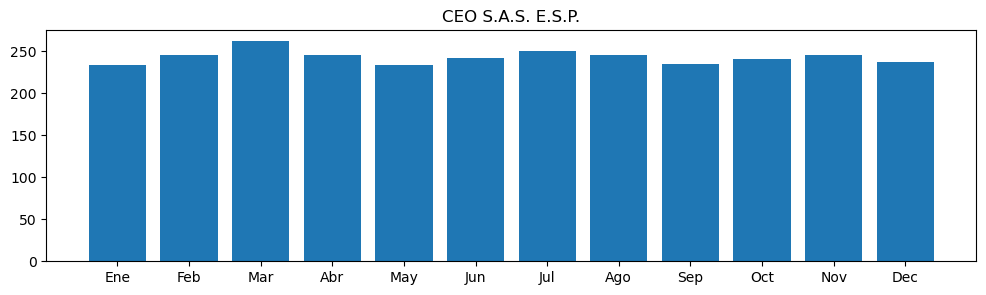

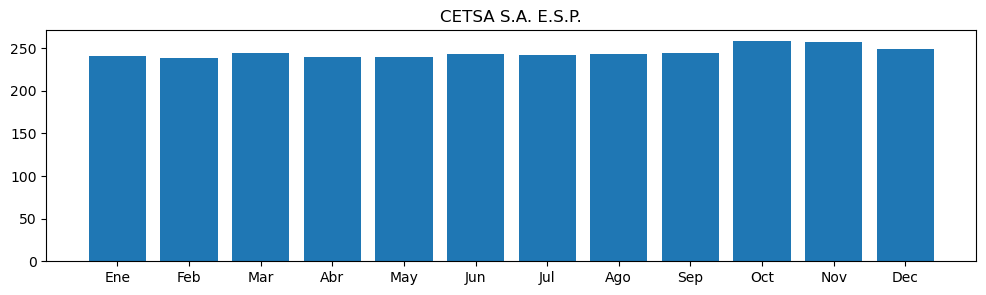

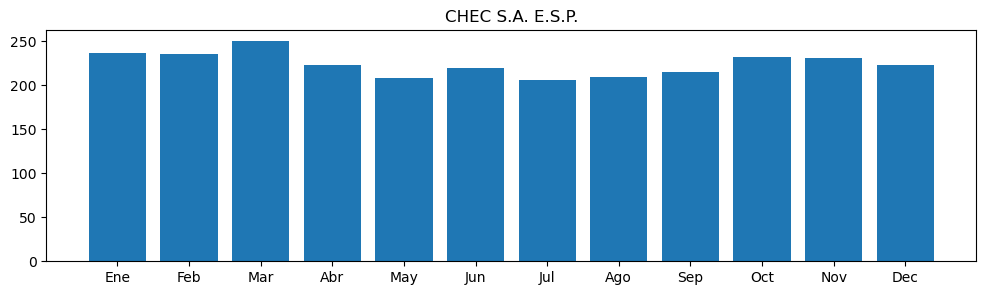

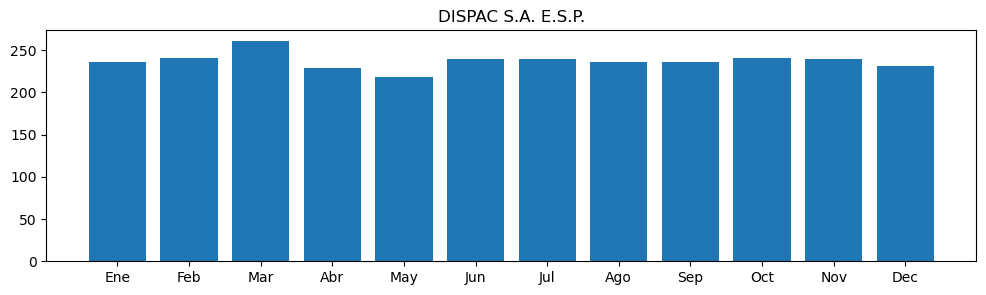

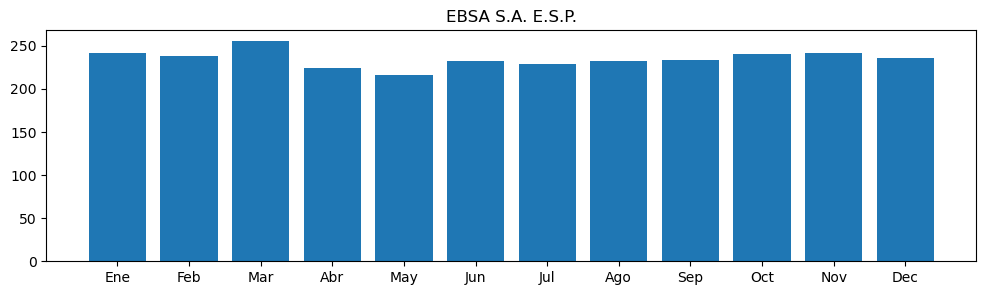

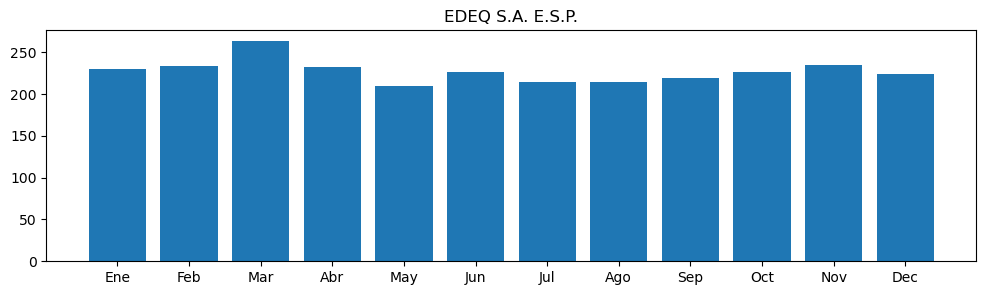

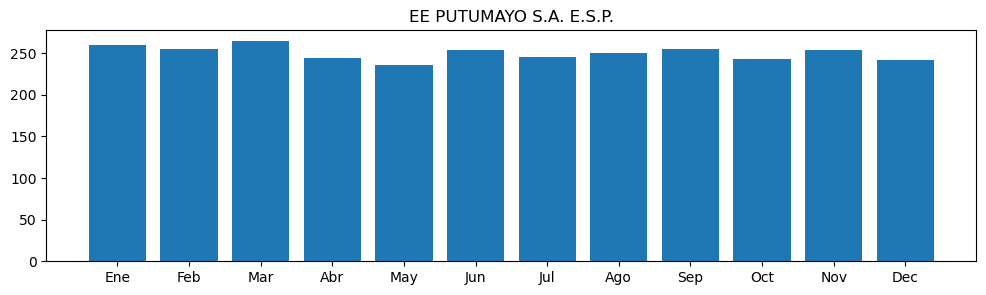

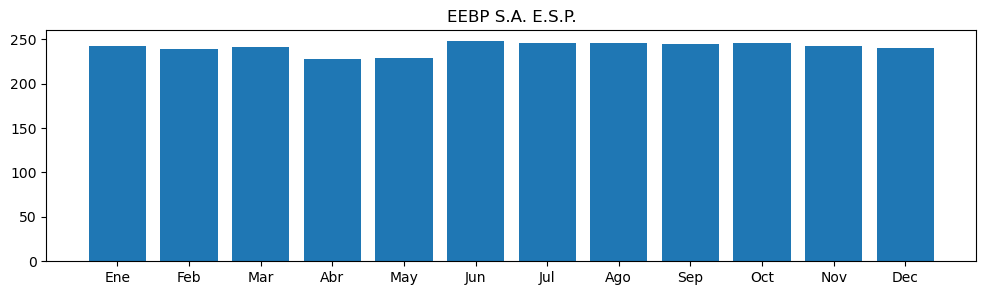

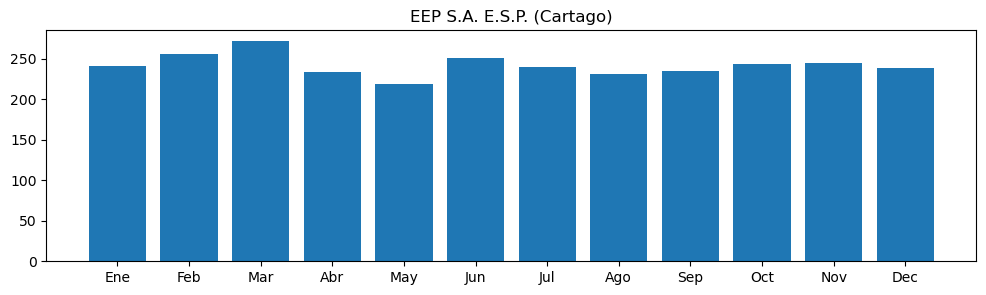

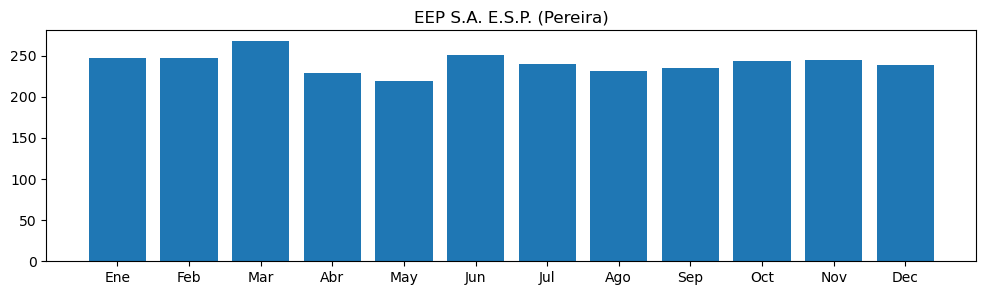

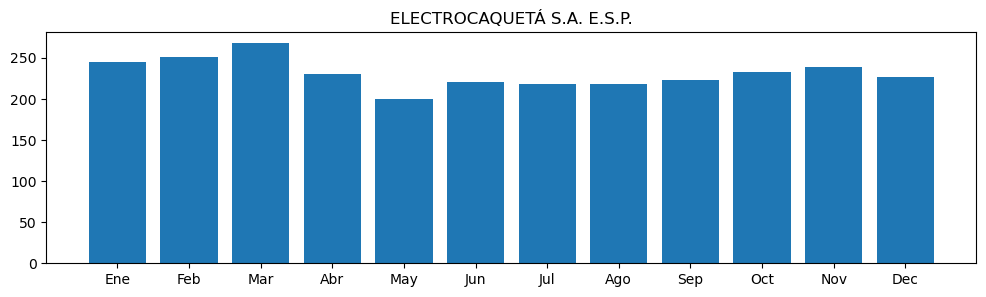

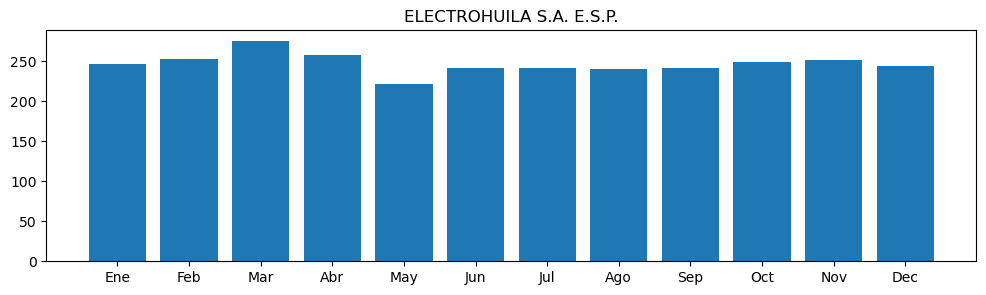

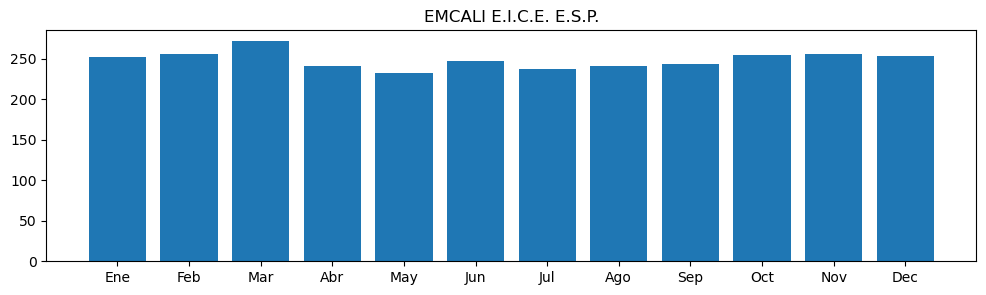

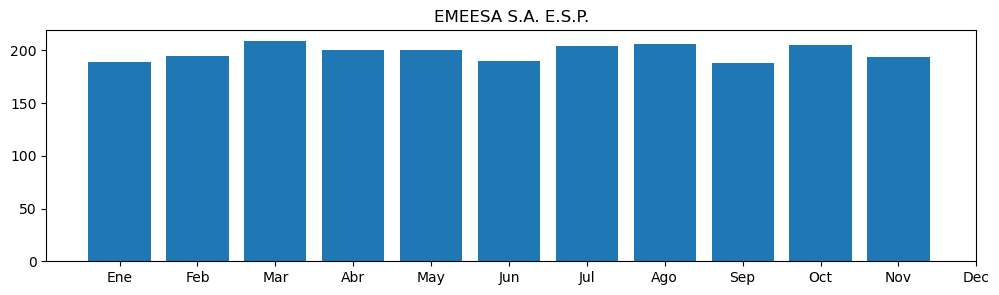

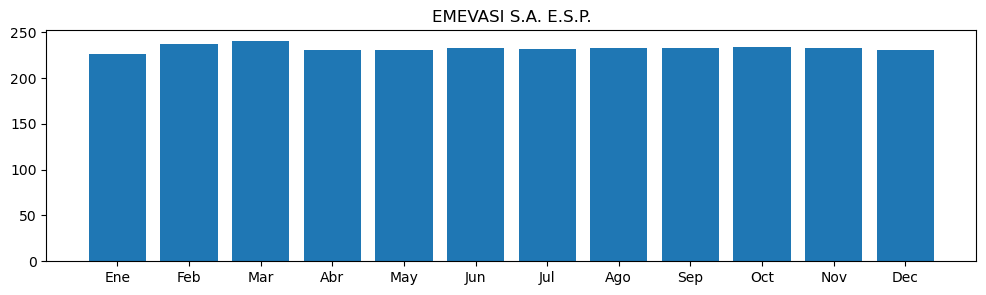

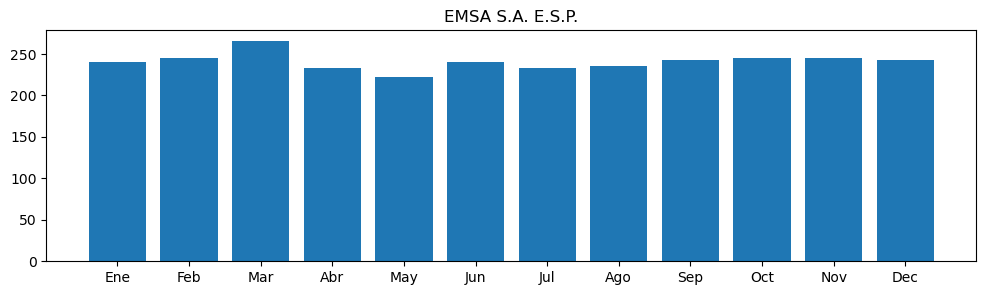

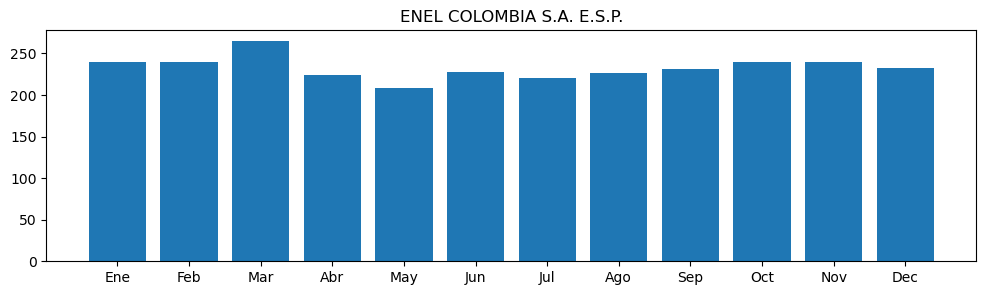

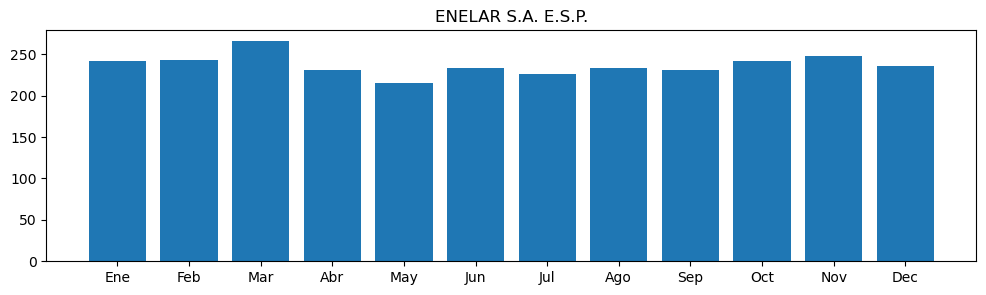

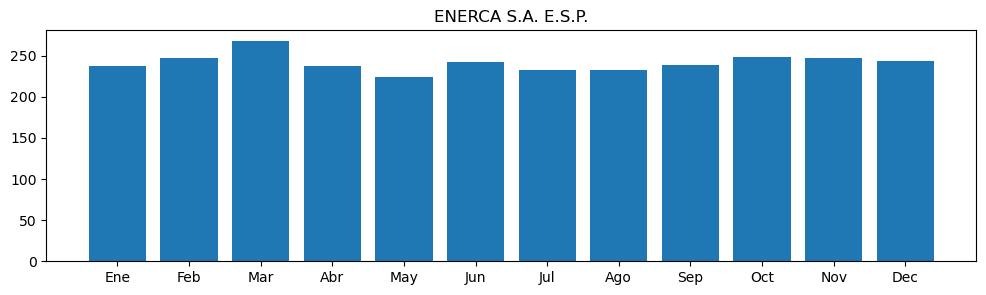

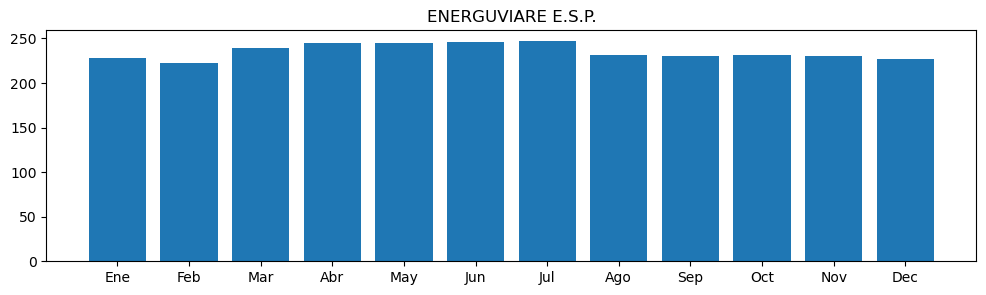

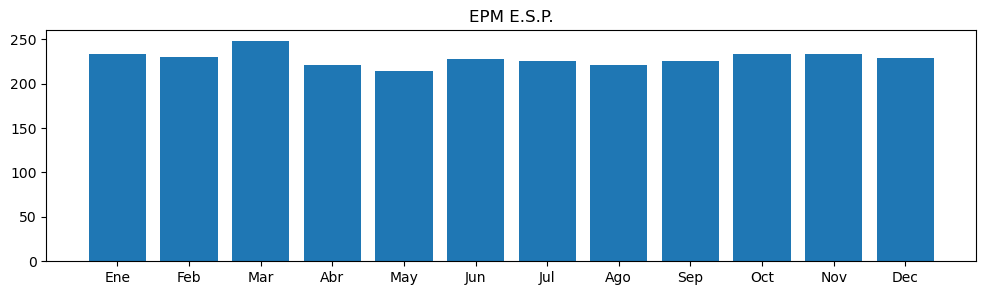

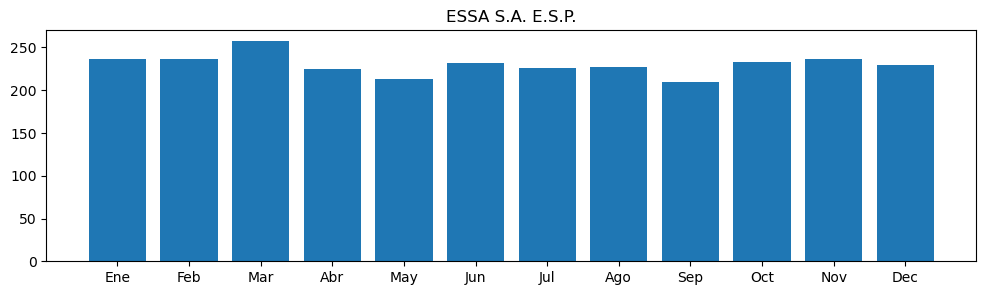

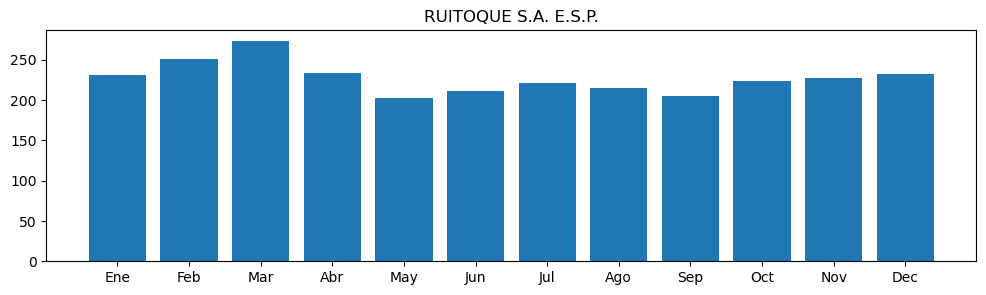

In [37]:
index_max2 = []
orden_meses = ["Ene","Feb","Mar","Abr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dec"]
dict_meses = { k:v for (k,v) in zip(range(1,13), orden_meses)}
for empresa in empresas:
    df2 = df_ipc[df_ipc["Empresa"]==empresa]
    df3 = df2[["Per","GM"]].groupby(["Per"]).mean()
    index_max2.append([empresa,dict_meses[df3["GM"].idxmax()]])
    plt.figure(figsize = (12, 3))
    plt.bar(x=df3.index,height=df3["GM"])
    plt.xticks(ticks = range(1,13), labels = orden_meses)
    plt.title(empresa)
    #plt.ylim([200,350])
    plt.show()
    #print(df2.shape[0])

In [38]:
index_max2
ind2 = pd.DataFrame(index_max2,columns=["Empresa","Mes con mayor precio promedio GM"])
#ind.sort_values(by="Empresa")
ind2

,Empresa,Mes con mayor precio promedio GM
0,AIR-E S.A.S. E.S.P.,Mar
1,CARIBEMAR DE LA COSTA S.A.S. E.S.P. (AFINIA),Mar
2,CEDENAR S.A. E.S.P.,Mar
3,CELSIA COLOMBIA S.A. E.S.P. TOLIMA,Mar
4,CELSIA COLOMBIA S.A. E.S.P. VALLE,Nov
5,CENS S.A. E.S.P.,Mar
6,CEO S.A.S. E.S.P.,Mar
7,CETSA S.A. E.S.P.,Oct
8,CHEC S.A. E.S.P.,Mar
9,DISPAC S.A. E.S.P.,Mar


In [39]:
print("Meses con mayor precio promedio GM")
print(ind2["Mes con mayor precio promedio GM"].value_counts())

Meses con mayor precio promedio GM
Mar    25
Nov     1
Oct     1
Jun     1
Jul     1
Name: Mes con mayor precio promedio GM, dtype: int64
